In [1]:
from corespray import corespraydf,load_galpy_potential
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
import time
import clustertools as cts

In [2]:
gcname='M3'
mu0 = 0.
sig0 = 7.6
vesc0 = 30.0
logrho0 = 3.67
rho0 = 10.0**3.67
mgc = 4.06e5
rgc = 0.15903
rcore = 1.23
W0 = 8.61469762517307
mmin = 0.1
mmax = 1.4
alpha = -1.35
Porb = 0.38782091641000876*1000

In [3]:
#Load a custom array of stellar masses to be used
#for the mass function
data=np.loadtxt('imf.txt',skiprows=1)
masses=data[:,0]

In [4]:
mwpot = load_galpy_potential(bar=False,dw_arm=False,trans_arm=False)


In [5]:
cspray = corespraydf(gcname, mwpot, mgc, rgc, W0,)

### Sample locations of single star and binary between 0
### and mean separation in core
### Relative distances will be between 0 and 2 x meanseparation

In [6]:
#Pass rsample=True to sample separation
#to change number of mean sepearations to sample from, pass nrsep=X
os, ob = cspray.sample_three_body(Porb, nstar=1000, binaries=True, mu0=mu0, sig0=sig0, vesc0=vesc0, rho0=rho0,m1=1.0,m2a=1.0,m2b=1.0,verbose=False,timing=False,method='dopr54_c',rsample=False, initialize=True)

In [7]:
dr2=cspray.dr
vesc2=cspray.vesc
e02=cspray.e0

In [8]:
np.amin(dr2),np.amax(dr2),cspray.rsep

(0.027382605722549622, 0.027382605722549622, 0.027382605722549622)

In [9]:
os, ob = cspray.sample_three_body(Porb, nstar=1000, binaries=True, mu0=mu0, sig0=sig0, vesc0=vesc0, rho0=rho0,m1=1.0,m2a=1.0,m2b=1.0,verbose=False,timing=False,method='dopr54_c',rsample=True,nrsep=1,initialize=True)

In [10]:
dr1=cspray.dr
vesc1=cspray.vesc
e01=cspray.e0

In [11]:
np.amin(dr1),np.amin(dr2),cspray.rsep

(0.00035734809447547893, 0.027382605722549622, 0.027853393046619532)

In [19]:
np.amax(dr1),np.amax(dr2),cspray.rsep

(0.025008110990893066, 0.027618856004379376, 0.027793849062155859)

In [12]:
a_max=2.0*4.302e-3*cspray.mbar/(sig0**2.0)

Text(0.5, 0, 'dr')

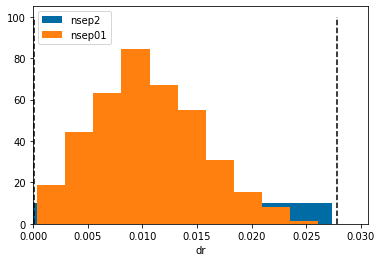

In [21]:
n,bins,patches=plt.hist(dr2,label='nsep2',density=True)
plt.hist(dr1,label='nsep01',density=True)
plt.plot([a_max,a_max],[0,100],'k--')
plt.plot([cspray.rsep,cspray.rsep],[0,100],'k--')

plt.xlim(0,1.1*cspray.rsep)
plt.legend()
plt.xlabel('dr')

In [27]:
ntest=1000

rs=0.1+np.random.rand(ntest)*(1-0.1)
phis=2.0*np.pi*np.random.rand(ntest)
thetas=np.arccos(1.0-2.0*np.random.rand(ntest))

xs=rs*np.cos(phis)*np.sin(thetas)
ys=rs*np.sin(phis)*np.sin(thetas)
zs=rs*np.cos(thetas)

rb=0.1+np.random.rand(ntest)*(1-0.1)
phib=2.0*np.pi*np.random.rand(ntest)
thetab=np.arccos(1.0-2.0*np.random.rand(ntest))

xb=rb*np.cos(phib)*np.sin(thetab)
yb=rb*np.sin(phib)*np.sin(thetab)
zb=rb*np.cos(thetab)

dr=np.sqrt((xs-xb)**2.+(ys-yb)**2.+(zs-zb)**2.)


(array([  38.,  127.,  186.,  186.,  211.,  131.,   70.,   41.,    6.,    4.]),
 array([ 0.06353757,  0.25577013,  0.44800268,  0.64023524,  0.8324678 ,
         1.02470036,  1.21693292,  1.40916548,  1.60139804,  1.7936306 ,
         1.98586316]),
 <BarContainer object of 10 artists>)

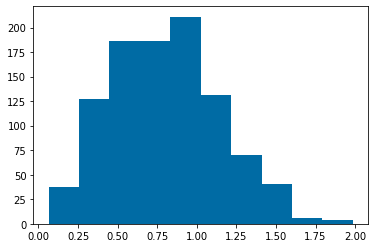

In [28]:
plt.hist(dr)

In [29]:
np.mean(dr)

0.8015274183381359

Text(0.5, 0, 'e0')

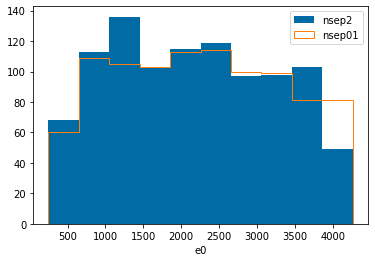

In [41]:
n,bins,patches=plt.hist(e02,label='nsep2')
plt.hist(e01,bins=bins,label='nsep01',histtype='step')
plt.legend()
plt.xlabel('e0')

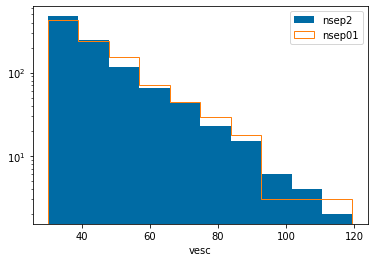

In [42]:
n,bins,patches=plt.hist(vesc2,label='nsep2')
plt.hist(vesc1,bins=bins,label='nsep01',histtype='step')
plt.legend()
plt.xlabel('vesc')
plt.yscale('log')

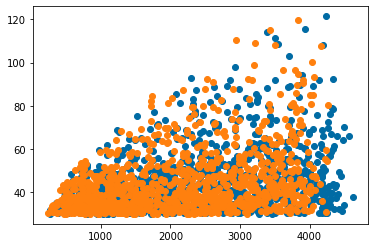

In [43]:
plt.scatter(e01,vesc1)
plt.scatter(e02,vesc2)

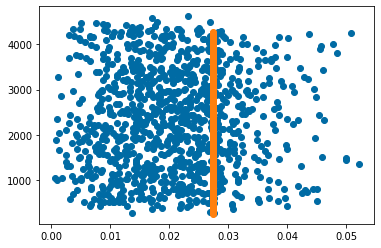

In [44]:
plt.scatter(dr1,e01)
plt.scatter(dr2,e02)

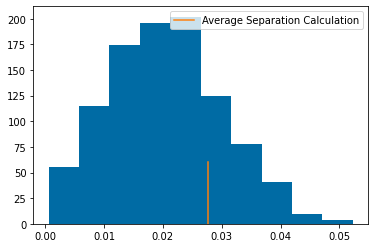

0.0276610615366 0.0205189209177


In [14]:
#Check reseparation distribution

plt.hist(cspray.dr)
plt.plot([cspray.rsep,cspray.rsep],[0,60],label='Average Separation Calculation')
plt.legend()
plt.show()
plt.close()

print(cspray.rsep,np.mean(cspray.dr))

### Extract parameters for the SINGLE escapers:

In [15]:
t_esc = cspray.tesc  # [Myr] in the past that star escaped
v_esc = cspray.vesc  # [km/s] kick velocity that star received
mstar = cspray.mstar # [Msol] mass of kicked star

In [16]:
# Would tesc of binary be same as escaper star?
v_esc_b = cspray.vescb  # [km/s] kick velocity that star received
m_b1 = cspray.mb1  # [Msol] mass of primary star
m_b2 = cspray.mb2  # [Msol] mass of secondary star
m_b_tot = m_b1 + m_b2  # [Msol]

# bindx is a boolean that gives indxs of binaries that escaped the cluster: 
bin_esc = cspray.bindx
print("{}/{} binaries escaped {}.".format(len(ob[bin_esc]), len(ob), gcname))

100/1000 binaries escaped M3.


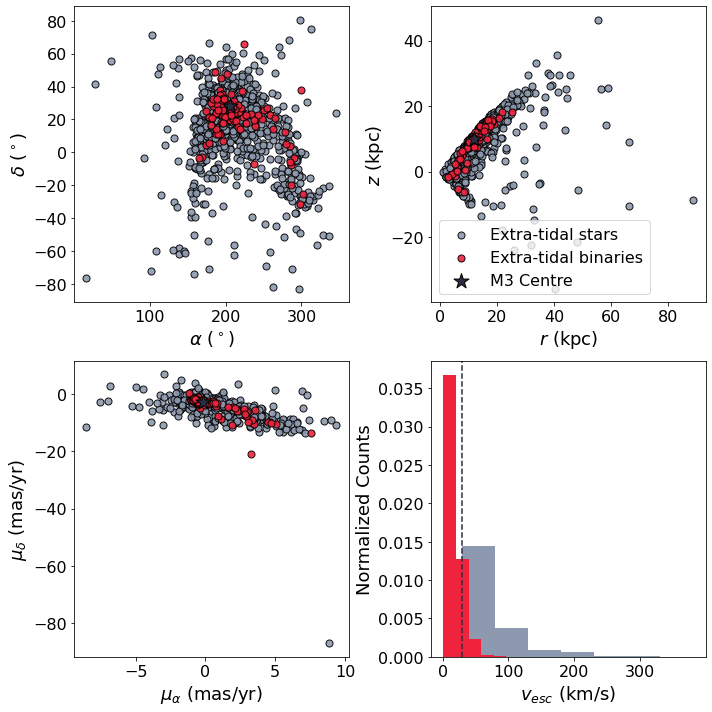

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# RA vs Dec positions:
ax[0, 0].scatter(os.ra(), os.dec(), marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9) 
ax[0, 0].scatter(ob.ra()[bin_esc], ob.dec()[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9) 
ax[0, 0].scatter(cspray.o.ra(), cspray.o.dec(), marker='*', s=250, edgecolor='black', c='#2b2d42')
ax[0, 0].set_xlabel(r"$\alpha$ ($^\circ $)", fontsize=18)
ax[0, 0].set_ylabel(r"$\delta$ ($^\circ $)", fontsize=18)
ax[0, 0].tick_params(axis='both', which='major', labelsize=16)
ax[0, 0].tick_params(axis='both', which='minor', labelsize=16)

# R vs z positions:
ax[0, 1].scatter(os.r(), os.z(), marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9, label='Extra-tidal stars') 
ax[0, 1].scatter(ob.r()[bin_esc], ob.z()[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9, label='Extra-tidal binaries') 
ax[0, 1].scatter(cspray.o.r(), cspray.o.z(), marker='*', s=250, edgecolor='black', c='#2b2d42', label='M3 Centre')
ax[0, 1].set_xlabel(r"$r$ (kpc)", fontsize=18)
ax[0, 1].set_ylabel(r"$z$ (kpc)", fontsize=18)
ax[0, 1].tick_params(axis='both', which='major', labelsize=16)
ax[0, 1].tick_params(axis='both', which='minor', labelsize=16)
ax[0, 1].legend(fontsize=16)

# Proper motion:
ax[1, 0].scatter(os.pmra(), os.pmdec(), marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9) 
ax[1, 0].scatter(ob.pmra()[bin_esc], ob.pmdec()[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9) 
ax[1, 0].scatter(cspray.o.pmra(), cspray.o.pmdec(), marker='*', s=250, edgecolor='black', c='#2b2d42')
ax[1, 0].set_xlabel(r"$\mu_{\alpha}$ (mas/yr)", fontsize=18)
ax[1, 0].set_ylabel(r"$\mu_{\delta}$ (mas/yr)", fontsize=18)
ax[1, 0].tick_params(axis='both', which='major', labelsize=16)
ax[1, 0].tick_params(axis='both', which='minor', labelsize=16)

# Escape velocities:
ax[1, 1].hist(v_esc, bins=7, color='#8d99ae', density=True)
ax[1, 1].hist(v_esc_b, bins=5, color='#ef233c', density=True)
ax[1, 1].axvline(vesc0, ls='--', c='#2b2d42')
ax[1, 1].tick_params(axis='both', which='major', labelsize=16)
ax[1, 1].tick_params(axis='both', which='minor', labelsize=16)
ax[1, 1].set_xlabel(r"$v_{esc}$ (km/s)", fontsize=18)
ax[1, 1].set_ylabel("Normalized Counts", fontsize=18)

fig.tight_layout()
plt.show()